In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [42]:
twitter_times = pd.read_csv("../data/rawdata/Twitter_dates.csv")
twitter_times.head()


#rainfall = pd.read_csv("../data/rawdata/water_gauge_rain.csv")
#rainfall.head()

,Number of tweets,Dates
0,56,8/18/17
1,3626,8/19/17
2,2328,8/20/17
3,1817,8/21/17
4,4967,8/22/17


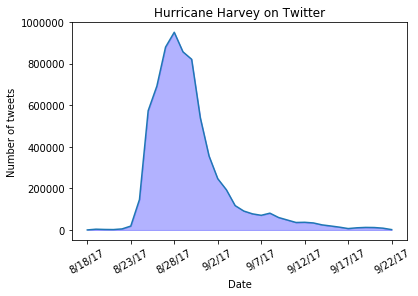

<Figure size 432x288 with 0 Axes>

In [43]:
y = twitter_times["Number of tweets"]
x = twitter_times["Dates"]

#import matplotlib.dates as mdates

plt.title("Hurricane Harvey on Twitter")
plt.xlabel("Date")
plt.ylabel("Number of tweets")

plt.plot(x,y)
#y = np.array([4,4,4,5,5,6,5,5,4,4,4])
#x = np.arange(y.shape[0])
#my_xticks = np.array(['a','b','c','d','e','f','g','h','i','j','k'])
frequency = 5
#plt.plot(x, y)
plt.xticks(x[::frequency],rotation=30)


plt.fill_between(x,y, color="blue", alpha=0.3)

plt.show()
plt.savefig("../images/HurricaneHarveyTweets.png")

In [19]:
rainfall["Total_rainfall"] = rainfall[rainfall.columns].sum(axis=1)
rainfall["Avg_rainfall"] = rainfall["Total_rainfall"] / (len(rainfall.columns) - 1)

harvey_rainfall = rainfall.truncate(before="8/18/2017", after="9/22/2017")                                
harvey_rainfall

#x = rainfall["Date"]
#y = rainfall["Total_rainfall"]

#plt.title("Total rainfall in bayou")
#plt.xlabel("Date")
#plt.ylabel("Rain (inches)")

#plt.fill_between(x,y, color="red", alpha=0.3)
#plt.plot(x,y)
#plt.show()

,Date,Dairy Ashford rain,Beltway 8 rain,San Felipe rain,Shepherd rain,Milam rain,Total_rainfall,Avg_rainfall
